<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/2-EconomicGrowth/GrowthAccounting_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Growth Rate: 2.3683639
Average TFP Growth: 0.3946321
Average Capital Deepening: 3.19665639009993
Average TFP Share: 447.29053
Average Capital Share: -144.75748220906627
     year    country countrycode        rgdpna      rkna        pop       emp  \
586  1976  Australia         AUS  369556.37500  0.183097  13.935731  5.960297   
587  1977  Australia         AUS  372870.84375  0.190591  14.092548  6.014012   
588  1978  Australia         AUS  387947.84375  0.202015  14.249401  6.031926   
589  1979  Australia         AUS  399719.12500  0.213262  14.413000  6.111774   
590  1980  Australia         AUS  413060.81250  0.227606  14.588405  6.277514   
591  1981  Australia         AUS  426809.28125  0.242974  14.777243  6.356343   
592  1982  Australia         AUS  417332.12500  0.253394  14.979205  6.340231   
593  1983  Australia         AUS  436451.34375  0.265361  15.194641  6.241294   
594  1984  Australia         AUS  459362.12500  0.280412  15.423166  6.458382   
595  1985  Au

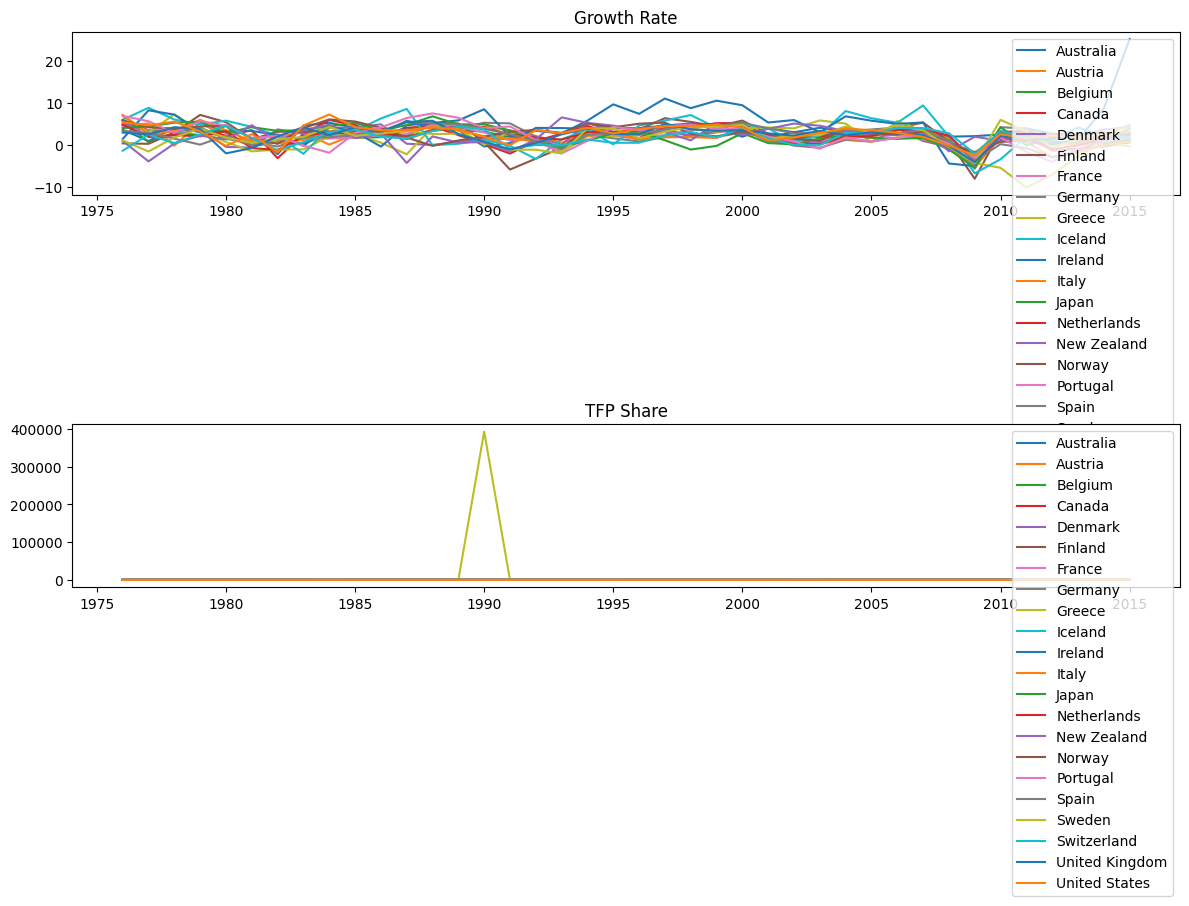

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')



# set the start and end dates for the data
start_date = '1960-01-01'
end_date = '2000-01-01'

# Select OECD countries
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
     'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'
]

# Filter and select relevant columns
data_all = pwt1001.loc[pwt1001['country'].isin(oecd_countries)][['year', 'country', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data_all = data_all.loc[(data_all['year'] >= 1975) & (data_all['year'] <= 2015)].dropna()

# Calculate additional variables
data_all['alpha'] = 1 - data_all['labsh']
data_all['y_n'] = data_all['rgdpna'] / data_all['emp']  # Y/N
data_all['hours'] = data_all['emp'] * data_all['avh']  # L
data_all['tfp_term'] = data_all['rtfpna'] ** (1 / (1 - data_all['alpha']))  # A^(1/(1-alpha))
data_all['cap_term'] = (data_all['rkna'] / data_all['rgdpna']) ** (data_all['alpha'] / (1 - data_all['alpha']))  # (K/Y)^(alpha/(1-alpha))
data_all['lab_term'] = data_all['hours'] / data_all['pop']  # L/N
data_all = data_all.sort_values(['country', 'year'])

# Calculate growth rates
data_all['growth_rate'] = data_all.groupby('country')['rgdpna'].pct_change() * 100
data_all['tfp_growth'] = data_all.groupby('country')['rtfpna'].pct_change() * 100
data_all['capital_deepening'] = (data_all['rkna'] / data_all['hours']).pct_change() * 100

# Calculate TFP Share and Capital Share
data_all['tfp_share'] = data_all['tfp_growth'] / data_all['growth_rate']
data_all['capital_share'] = (data_all['alpha'] * data_all['capital_deepening']) / data_all['growth_rate']



# Calculate average of each category
average_growth_rate = data_all['growth_rate'].mean()
average_tfp_growth = data_all['tfp_growth'].mean()
average_capital_deepening = data_all['capital_deepening'].mean()
average_tfp_share = data_all['tfp_share'].mean()
average_capital_share = data_all['capital_share'].mean()

# Print averages
print("Average Growth Rate:", average_growth_rate)
print("Average TFP Growth:", average_tfp_growth)
print("Average Capital Deepening:", average_capital_deepening)
print("Average TFP Share:", average_tfp_share)
print("Average Capital Share:", average_capital_share)






# Remove rows with NaN values resulted from pct_change
data_all = data_all.dropna()

# Print first 10 rows of data
print(data_all.head(10))

# Plot data
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for country in oecd_countries:
    country_data = data_all[data_all['country'] == country]
    plt.plot(country_data['year'], country_data['growth_rate'], label=country)
plt.legend()
plt.title('Growth Rate')

plt.subplot(2, 1, 2)
for country in oecd_countries:
    country_data = data_all[data_all['country'] == country]
    plt.plot(country_data['year'], country_data['tfp_share'], label=country)
plt.legend()
plt.title('TFP Share')

plt.tight_layout()
plt.show()







